In [1]:
import numpy
import numba
from numba import jit
from math import pi
from matplotlib import pyplot
%matplotlib inline

nx = 41
ny = 41

l = 1.
h = 1.

dx = l/(nx-1)
dy = h/(ny-1)

p = numpy.zeros((ny,nx))
w = numpy.zeros((ny,nx))

l1_target = 1e-6

def L1norm(new, old):
    norm = numpy.sum(numpy.abs(new-old))
    return norm

In [2]:
def poisson_2d_1step(p, b, dx, dy):
    '''Performs Jacobi relaxation
    
    Parameters:
    ----------
    p : 2D array of floats
        Initial guess
    b : 2D array of floats
        Source term
    dx: float
        Mesh spacing in x direction
    dy: float
        Mesh spacing in y direction
    l2_target: float
        Target difference between two consecutive iterates
    
    Returns:
    -------
    p: 2D array of float
        Distribution after relaxation
    '''
    pd = p.copy()

    p[1:-1,1:-1] = 1/(2*(dx**2 + dy**2)) * \
                    ((pd[1:-1,2:]+pd[1:-1,:-2])*dy**2 +\
                    (pd[2:,1:-1] + pd[:-2,1:-1])*dx**2 -\
                     b[1:-1,1:-1]*dx**2*dy**2)
    
    #enfocing BC elsewhere
    l1= L1norm(p, pd)
    
    return p, l1        

In [3]:
def enforceBCphi(p,dy):
#dirichlet condition
    #top
    p[1:-1,-1]=0
    #bottom
    p[1:-1,1]=0
    #left
    p[1,1:-1]=0
    #right
    p[-1,1:-1]=0
#neumann condition
    #top
    p[2:-2,-2]=dy
    #bottom
    p[2:-2,2]=0
    #left
    p[2,2:-2]=0
    #right
    p[-2,2:-2]=0
    return p

def enforceBCw(w,p,dx,dy):
    #neumann + laplace
    #top
    w[1:-1,-1]=-(8*p[1:-1,-2]-p[1:-1, -3])/2/dy/dy - 3/dy
    #bottom
    w[1:-1,1]=-(8*p[1:-1,2]-p[1:-1,3])/2/dy/dy
    #left
    w[1,1:-1]=-(8*p[2,1:-1]-p[3,1:-1])/2/dx/dx
    #right
    w[-1,1:-1]=-(8*p[-2,1:-1]-p[-3,1:-1])/2/dx/dx
    return w



In [4]:
def stokesSolver(p, w, dx, dy, nx, ny, l1Target):
    l1phi=1
    l1w=1
    while 0 and l1phi>l1Target or l1w>l1Target:
        p, l1phi = poisson_2d_1step(p, -w, dx, dy)
        enforceBCphi(p,dy)
        w, l1w = poisson_2d_1step(w, numpy.zeros((p.shape)), dx, dy)
        enforceBCw(w,p,dx,dy)
    return p, w, l1phi, l1w

In [5]:
def plot2D(p, nx, ny, lx, ly):
    x=numpy.linspace(0, lx, nx)
    y=numpy.linspace(0, ly, ny)
    pyplot.figure(fisize=(8,5))
    pyplot.contourf(x,y,p,20,cmap=cm.viridis)
    pyplot.xlabel('$x$')
    pyplot.ylabel('$y$')
    pyplot.colorbar

In [6]:
stokesSolver(p,w,dx,dy, nx, ny ,l1_target)

(array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.025,  0.   ],
        ..., 
        [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.025,  0.   ],
        [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
        [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ]]),
 array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
        [   0.,   -0.,   -0., ...,   -0., -140., -120.],
        [   0.,   -0.,    0., ...,    0.,    0., -280.],
        ..., 
        [   0.,   -0.,    0., ...,    0.,    0., -280.],
        [   0.,   -0.,    0., ...,    0.,    0., -120.],
        [   0.,   -0.,   -0., ...,   -0.,   20.,    0.]]),
 0.0,
 0.0)

<function matplotlib.pyplot.colorbar>

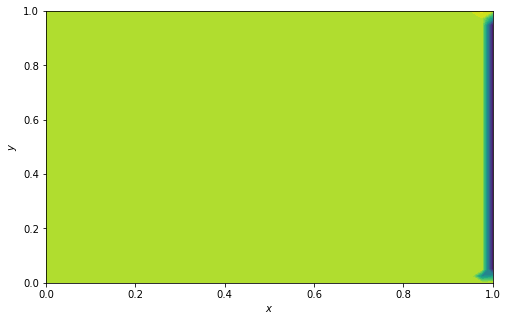

In [9]:
x=numpy.linspace(0, l, nx)
y=numpy.linspace(0, h, ny)
pyplot.figure(figsize=(8,5))
pyplot.contourf(x,y,w,20)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.colorbar